# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?&APPID={weather_api_key}&units=imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | glendive
Processing Record 2 of Set 1 | mount carmel
Processing Record 3 of Set 1 | hawaiian paradise park
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | diphu
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | beloyarskiy
Processing Record 9 of Set 1 | hadibu
Processing Record 10 of Set 1 | bideford
Processing Record 11 of Set 1 | wailua homesteads
Processing Record 12 of Set 1 | geraldton
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | nemuro
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | tver
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | whitehorse
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | tobol'sk
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | por

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,glendive,47.1053,-104.7125,48.76,93,100,23.02,US,1715105059
1,mount carmel,38.4109,-87.7614,80.82,70,99,20.92,US,1715105059
2,hawaiian paradise park,19.5933,-154.9731,71.04,98,100,4.61,US,1715105059
3,talnakh,69.4865,88.3972,12.20,95,92,5.21,RU,1715105059
4,diphu,25.8333,93.4333,70.41,75,0,0.69,IN,1715105059


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,glendive,47.1053,-104.7125,48.76,93,100,23.02,US,1715105059
1,mount carmel,38.4109,-87.7614,80.82,70,99,20.92,US,1715105059
2,hawaiian paradise park,19.5933,-154.9731,71.04,98,100,4.61,US,1715105059
3,talnakh,69.4865,88.3972,12.20,95,92,5.21,RU,1715105059
4,diphu,25.8333,93.4333,70.41,75,0,0.69,IN,1715105059


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

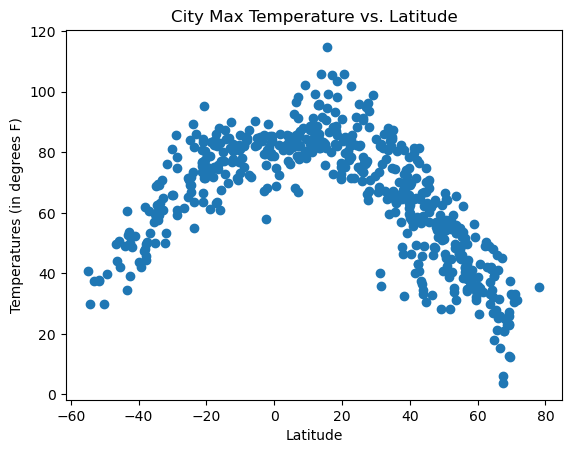

In [11]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]

plt.scatter(lat, temp)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Temperatures (in degrees F)")
plt.title("City Max Temperature vs. Latitude")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()



#### Latitude Vs. Humidity

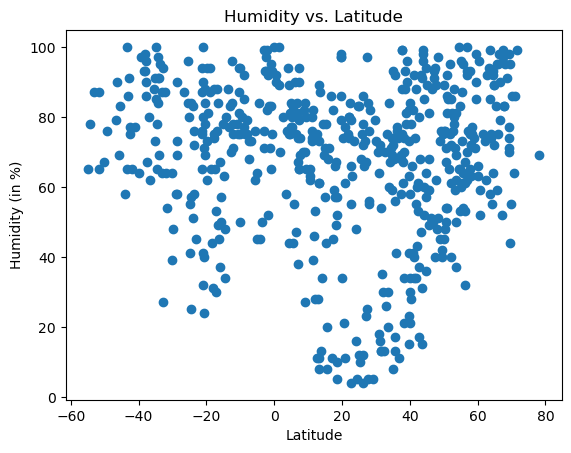

In [12]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]

plt.scatter(lat, humidity)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (in %)")
plt.title("Humidity vs. Latitude")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

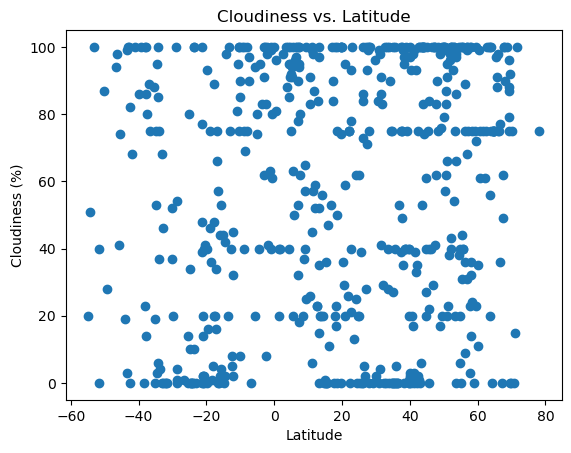

In [13]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]

plt.scatter(lat, cloudiness)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs. Latitude")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

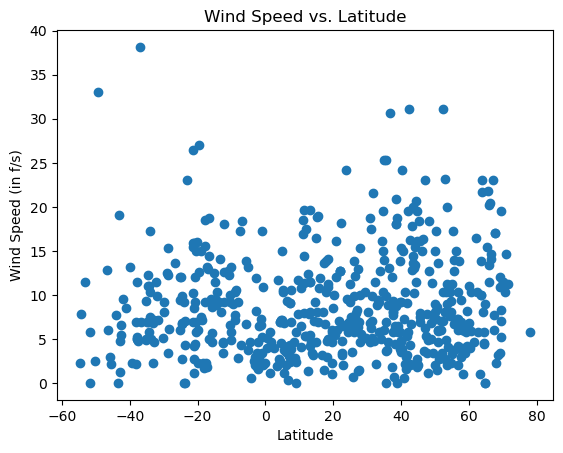

In [14]:
# Build the scatter plots for latitude vs. wind speed
wind = city_data_df["Wind Speed"]

plt.scatter(lat, wind)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (in f/s)")
plt.title("Wind Speed vs. Latitude")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, color='red')
    plt.text(-2, 20, line_eq, fontsize=12, color='red')
    print(f"The r-value is: {rvalue:.2f}.")


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,glendive,47.1053,-104.7125,48.76,93,100,23.02,US,1715105059
1,mount carmel,38.4109,-87.7614,80.82,70,99,20.92,US,1715105059
2,hawaiian paradise park,19.5933,-154.9731,71.04,98,100,4.61,US,1715105059
3,talnakh,69.4865,88.3972,12.20,95,92,5.21,RU,1715105059
4,diphu,25.8333,93.4333,70.41,75,0,0.69,IN,1715105059


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,edinburgh of the seven seas,-37.0676,-12.3116,60.44,80,89,38.16,SH,1715105059
6,port-aux-francais,-49.3500,70.2167,39.83,76,28,33.04,TF,1715105059
11,geraldton,-28.7667,114.6000,59.41,58,1,3.44,AU,1715105060
12,waitangi,-43.9535,-176.5597,48.90,58,19,7.74,NZ,1715105060
14,puerto ayora,-0.7393,-90.3518,84.16,93,61,1.99,EC,1715105060


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.85.


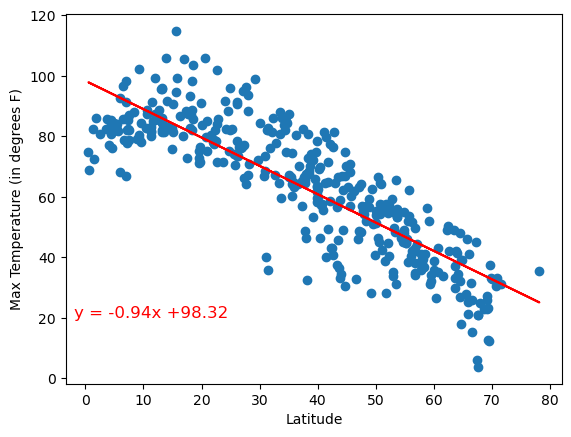

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

linear_regression_plot(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (in degrees F)")
plt.show()


The r-value is: 0.82.


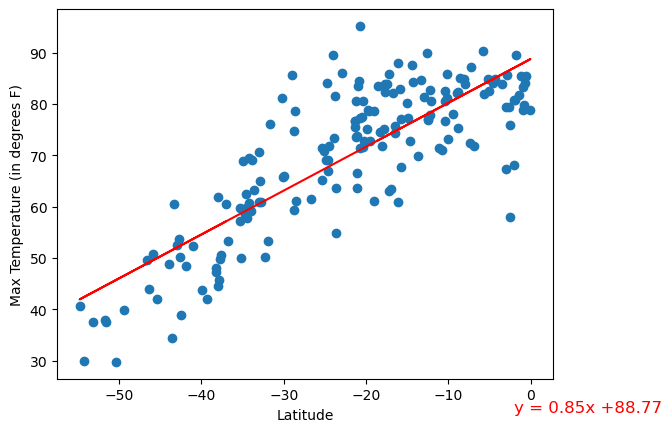

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

linear_regression_plot(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (in degrees F)")
 
plt.show()


**Discussion about the linear relationship:** Both r-values indicate there is a strong association between Latitude and Maximum Temperature (per city), meaning as you approach the equator (Latitude = 0), the more likely it is that there is a higher Max Temperature per city. As you move northward from the south pole (increasing from -50 degrees to 0 degrees), temperatures would be higher near the equator. Likewise, moving southward from the north pole (80 degrees to 0 degrees), temperatures would be higher near the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.18.


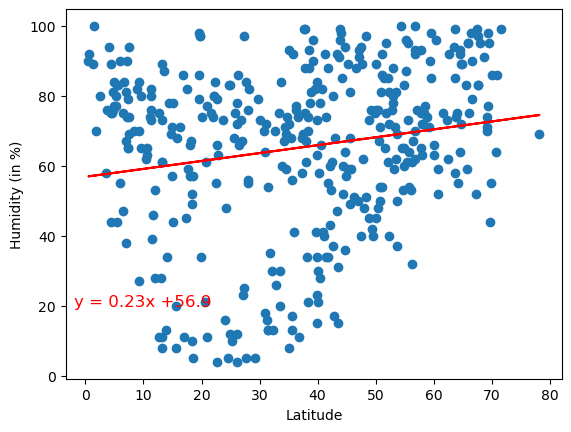

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

linear_regression_plot(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (in %)")

plt.show()


The r-value is: -0.04.


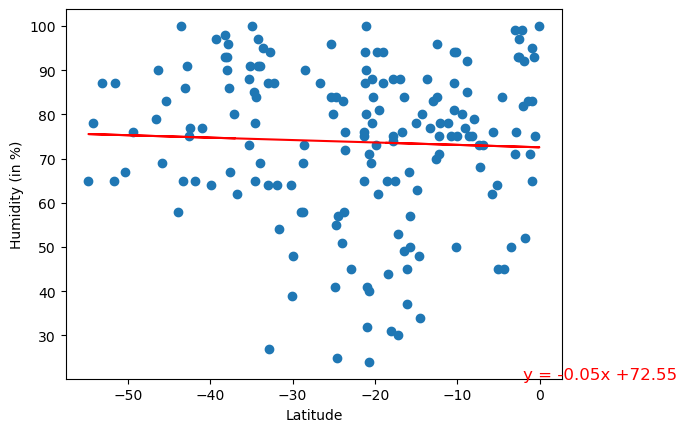

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

linear_regression_plot(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (in %)")

plt.show()


**Discussion about the linear relationship:** Both r-values indicate weak to no association between Latitude and Humidity as you approach the equator (0 degrees) from either pole. Relatively flat line linear regression lines indicates no ability to predict humidity based on latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06.


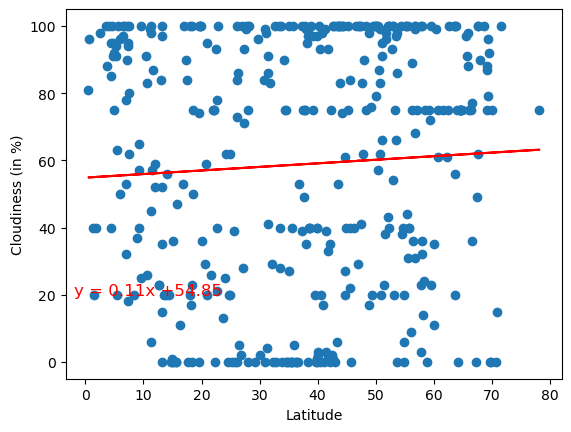

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

linear_regression_plot(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (in %)")

plt.show()


The r-value is: 0.14.


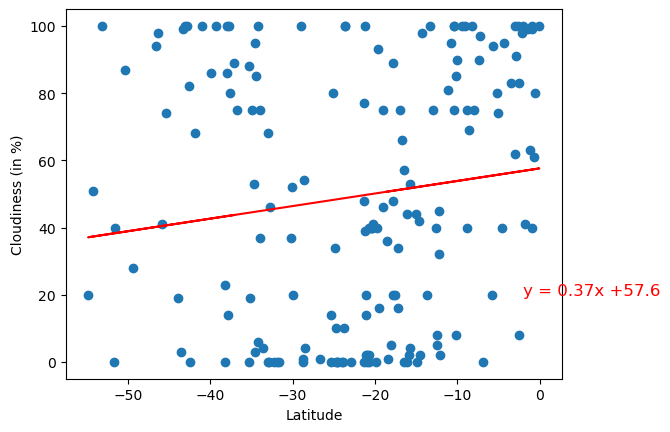

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

linear_regression_plot(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (in %)")

plt.show()


**Discussion about the linear relationship:** Both r-values indicate weak to no association between Latitude and Cloudiness as you approach the equator (0 degrees) from either pole. Clustering of points at 0% and 100% Cloudiness may indicate an association between Cloudiness and another factor, but Latitude is a poor predictor of Cloudiness per degree Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.13.


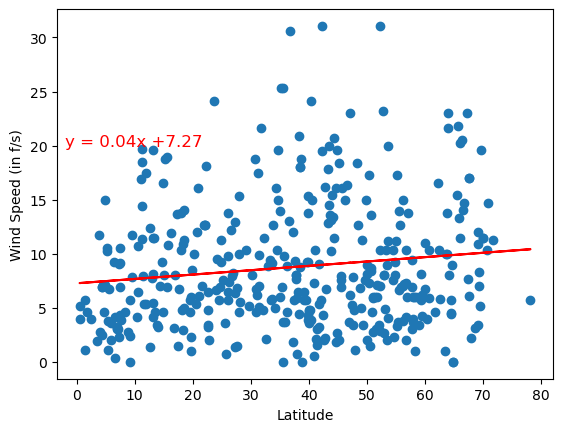

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

linear_regression_plot(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (in f/s)")

plt.show()


The r-value is: -0.03.


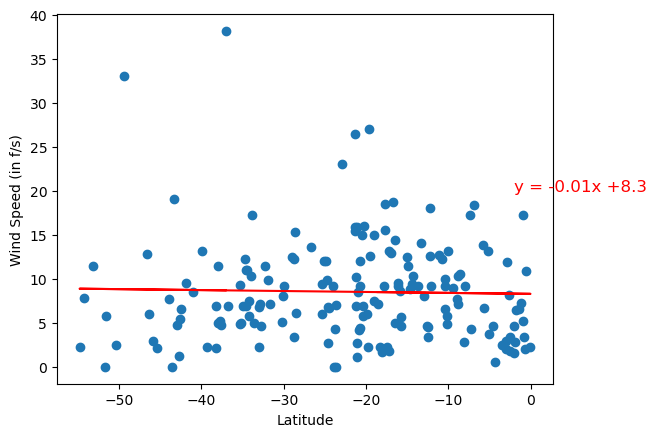

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

linear_regression_plot(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (in f/s)")

plt.show()


**Discussion about the linear relationship:** Both r-values indicate weak to no association between Latitude and Wind Speed as you approach the equator (0 degrees) from either pole. As with Humidity above, relatively flat line linear regression lines indicates no ability to predict wind speed based on latitude.